In [1]:
import pandas as pd

ZOMS = '/kaggle/input/zomato-stock-price/zomato.csv'

df = pd.read_csv(filepath_or_buffer=ZOMS, parse_dates=['Date']).drop(columns=['High', 'Low', 'Adj Close'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Open,Close,Volume,year
0,2021-07-23,116.000000,126.000000,694895290,2021
1,2021-07-26,126.349998,140.649994,249723854,2021
2,2021-07-27,141.699997,132.899994,240341900,2021
3,2021-07-28,131.000000,131.199997,159793731,2021
4,2021-07-29,134.949997,141.550003,117973089,2021


We only have three-plus years of stock quotes, and the stock has traded in a range, dropping to about 25% of its high and returning to roughly where it was at the beginning of the period of interest. We can pick almost any of the available quotes to be definitive; the closing prices and the adjusted closing prices are identical, since there have been no splits or dividends.

<Axes: xlabel='Date', ylabel='Close'>

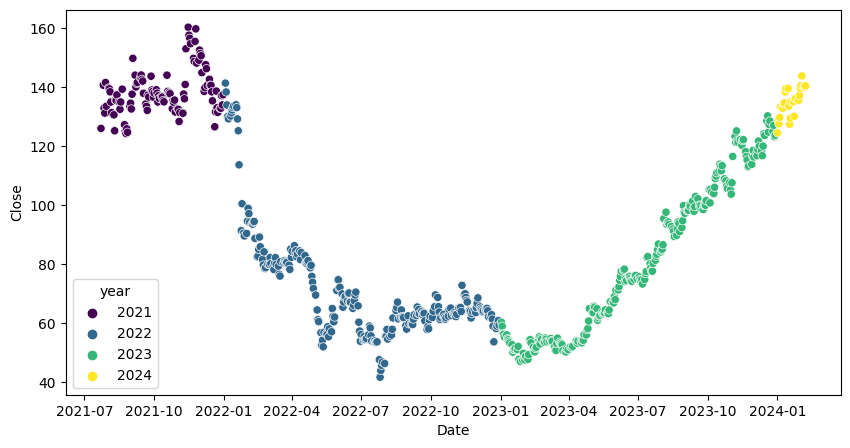

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis')

Let's make a synthetic approximation to the dollar amount traded each day. Let's build it out of the volume and the mean between the open and the close.

<Axes: xlabel='Date', ylabel='dollars'>

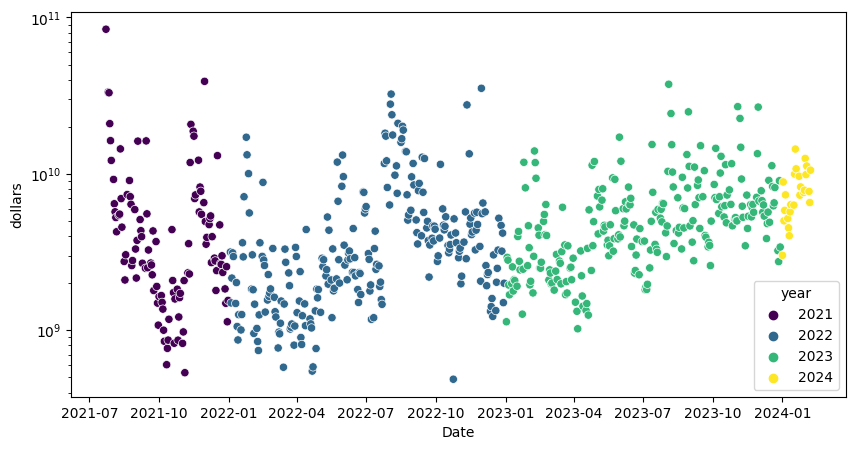

In [3]:
df['dollars'] = 0.5 * df['Volume'] * (df['Open'] + df['Close']) 

plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', hue='year', palette='viridis')

Is this what you would expect to see? We sort of see an upward trend over time, which is kind of surprising.